<a href="https://colab.research.google.com/github/murtazav/Pollution_Prediction-/blob/master/Univariate_lstm(pm2_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded=files.upload()

Saving bdatatest.csv to bdatatest.csv
Saving bdatatrain.csv to bdatatrain.csv


In [15]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('bdatatrain.csv')
dataset_train = dataset_train.dropna()
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)





Epoch 1/50
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0072
Epoch 2/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 3/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 4/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 5/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 6/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 7/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 8/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0035
Epoch 9/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 10/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 11/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0029
Epoch 12/50
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0028

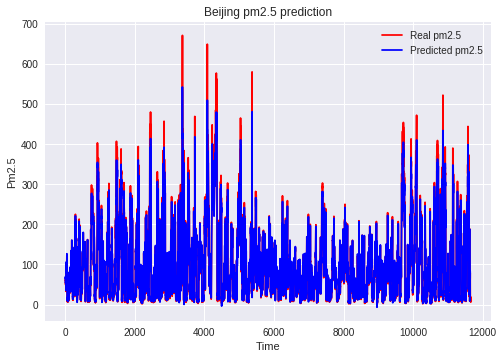

In [17]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('bdatatest.csv')
dataset_test = dataset_test.dropna()
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['pm2_5'], dataset_test['pm2_5']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 11700):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real pm2.5')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted pm2.5')
plt.title('Beijing pm2.5 prediction')
plt.xlabel('Time')
plt.ylabel('Pm2.5')
plt.legend()
plt.show()
